In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1 = pd.read_csv('city_rentals.csv')
df1.head()

,price,size,balcony,juliet_balcony,basement,terrace,loggia,yard,attic,floor,rooms,offering,date_listed,street,borough
0,19900,118.0,0,0,0,1,0,0,0,4.0,3.0,agency,2023-06-18,Witolda,Stare miasto
1,19000,120.0,0,0,0,1,0,1,0,0.0,4.0,agency,2023-02-16,Bartla,Śródmieście
2,18000,113.0,0,0,0,0,0,0,0,4.0,3.0,agency,2022-01-24,Pomorska,Stare miasto
3,16000,110.0,0,0,0,0,0,0,0,47.0,2.0,agency,2022-05-26,Gwiaździsta,Krzyki
4,16000,120.0,0,0,0,1,0,0,0,1.0,4.0,agency,2023-03-17,Racławicka,Krzyki


In [4]:
df1['price_per_sqr'] = df1['price']/df1['size']

In [5]:
df1 = df1.drop(['attic'], axis='columns')
df1.corr(method ='pearson', numeric_only=True )

,price,size,balcony,juliet_balcony,basement,terrace,loggia,yard,floor,rooms,price_per_sqr
price,1.000000,0.701192,-0.048033,-0.025839,0.015675,0.307410,0.007452,0.037664,0.160965,0.579095,0.393234
size,0.701192,1.000000,-0.015059,-0.029218,0.082159,0.237894,-0.002142,0.033974,0.036092,0.777964,-0.252835
balcony,-0.048033,-0.015059,1.000000,-0.072025,0.033745,-0.324696,-0.163712,-0.074602,0.007261,0.067501,-0.081379
juliet_balcony,-0.025839,-0.029218,-0.072025,1.000000,0.052699,-0.019782,-0.009974,-0.013714,0.010975,-0.024469,0.004138
basement,0.015675,0.082159,0.033745,0.052699,1.000000,-0.002810,0.022094,-0.006585,-0.008510,0.112944,-0.091818
terrace,0.307410,0.237894,-0.324696,-0.019782,-0.002810,1.000000,-0.044964,0.125463,-0.026040,0.175869,0.107545
loggia,0.007452,-0.002142,-0.163712,-0.009974,0.022094,-0.044964,1.000000,-0.014564,0.072479,0.013730,0.014940
yard,0.037664,0.033974,-0.074602,-0.013714,-0.006585,0.125463,-0.014564,1.000000,-0.175624,0.038503,-0.003570
floor,0.160965,0.036092,0.007261,0.010975,-0.008510,-0.026040,0.072479,-0.175624,1.000000,0.020098,0.151787
rooms,0.579095,0.777964,0.067501,-0.024469,0.112944,0.175869,0.013730,0.038503,0.020098,1.000000,-0.222459


<Axes: >

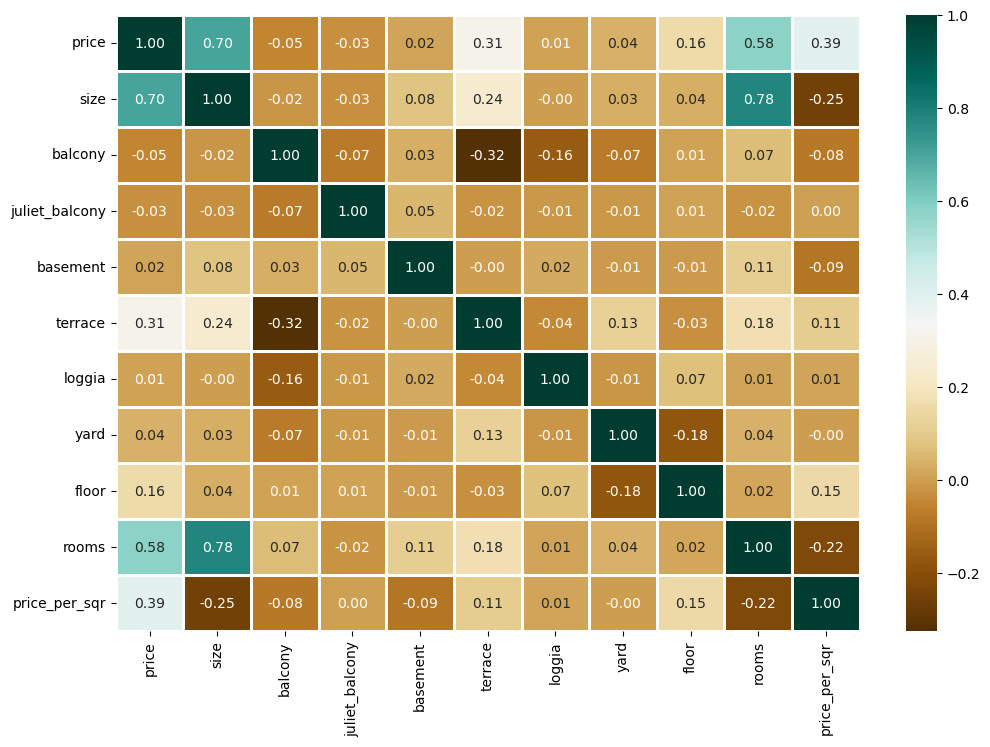

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(method ='pearson', numeric_only=True),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           6180 non-null   int64  
 1   size            6180 non-null   float64
 2   balcony         6180 non-null   int64  
 3   juliet_balcony  6180 non-null   int64  
 4   basement        6180 non-null   int64  
 5   terrace         6180 non-null   int64  
 6   loggia          6180 non-null   int64  
 7   yard            6180 non-null   int64  
 8   floor           6073 non-null   float64
 9   rooms           6163 non-null   float64
 10  offering        6180 non-null   object 
 11  date_listed     6180 non-null   object 
 12  street          5625 non-null   object 
 13  borough         6101 non-null   object 
 14  price_per_sqr   6180 non-null   float64
dtypes: float64(4), int64(7), object(4)
memory usage: 724.3+ KB


In [8]:
df2 = df1.drop(['balcony', 'juliet_balcony', 'basement', 'loggia', 'yard', 'offering', 'borough','date_listed'], axis='columns')
df2.head()

,price,size,terrace,floor,rooms,street,price_per_sqr
0,19900,118.0,1,4.0,3.0,Witolda,168.644068
1,19000,120.0,1,0.0,4.0,Bartla,158.333333
2,18000,113.0,0,4.0,3.0,Pomorska,159.292035
3,16000,110.0,0,47.0,2.0,Gwiaździsta,145.454545
4,16000,120.0,1,1.0,4.0,Racławicka,133.333333


In [9]:
df2.isnull().sum()/df2.count()*100

price            0.000000
size             0.000000
terrace          0.000000
floor            1.761897
rooms            0.275840
street           9.866667
price_per_sqr    0.000000
dtype: float64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

price            0
size             0
terrace          0
floor            0
rooms            0
street           0
price_per_sqr    0
dtype: int64

In [11]:
len(df3['street'].unique())

795

In [12]:
df3['rooms'].unique()

array([3., 4., 2., 5., 6., 1., 7.])

In [13]:
df3['street'] = df3['street'].apply(lambda x: x.strip())
df_street = df3.groupby('street')['street'].agg('count').sort_values(ascending=False)
df_street

/tmp/ipykernel_8545/364772890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['street'] = df3['street'].apply(lambda x: x.strip())


street
Legnicka           103
Witolda            101
Kościuszki          93
Walońska            92
Grabiszyńska        71
                  ... 
Hlonda               1
Cinciały             1
Spadochroniarzy      1
Marcinkowskiego      1
Rakietowa            1
Name: street, Length: 795, dtype: int64

In [14]:
len(df_street[df_street< 10])

647

In [15]:
df_other = df_street[df_street< 10]
df_other

street
Hubska                9
Na ostatnim groszu    9
Jaworska              9
Biskupia              9
Zielna                9
                     ..
Hlonda                1
Cinciały              1
Spadochroniarzy       1
Marcinkowskiego       1
Rakietowa             1
Name: street, Length: 647, dtype: int64

In [16]:
df3.street = df3.street.apply(lambda x : 'other' if x in df_other else x)
len(df3.street.unique())

/tmp/ipykernel_8545/1286746303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.street = df3.street.apply(lambda x : 'other' if x in df_other else x)


149

In [17]:
df3.head()

,price,size,terrace,floor,rooms,street,price_per_sqr
0,19900,118.0,1,4.0,3.0,Witolda,168.644068
1,19000,120.0,1,0.0,4.0,other,158.333333
2,18000,113.0,0,4.0,3.0,other,159.292035
3,16000,110.0,0,47.0,2.0,Gwiaździsta,145.454545
4,16000,120.0,1,1.0,4.0,Racławicka,133.333333


In [18]:
df3['size'].sort_values(ascending=False)

14      450.0
12      450.0
13      450.0
6157    210.0
241     180.0
        ...  
6161     12.0
6159     10.0
6170     10.0
6172     10.0
6158      6.0
Name: size, Length: 5528, dtype: float64

In [19]:
df3['price_per_sqr'].sort_values(ascending=False)

135     207.317073
136     183.744055
508     175.000000
0       168.644068
6158    166.666667
           ...    
6174     10.000000
6177      7.954545
6175      6.875000
6179      6.250000
6157      5.238095
Name: price_per_sqr, Length: 5528, dtype: float64

In [20]:
df3.describe()

,price,size,terrace,floor,rooms,price_per_sqr
count,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000
mean,3180.086469,51.856147,0.078509,2.826700,2.223408,63.281419
std,1587.688219,22.159624,0.268996,2.765158,0.808751,18.098324
min,250.000000,6.000000,0.000000,-1.000000,1.000000,5.238095
25%,2400.000000,39.100000,0.000000,1.000000,2.000000,51.020408
50%,2800.000000,49.000000,0.000000,2.000000,2.000000,60.416667
75%,3500.000000,60.000000,0.000000,4.000000,3.000000,72.916667
max,19900.000000,450.000000,1.000000,47.000000,7.000000,207.317073


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5528 entries, 0 to 6179
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          5528 non-null   int64  
 1   size           5528 non-null   float64
 2   terrace        5528 non-null   int64  
 3   floor          5528 non-null   float64
 4   rooms          5528 non-null   float64
 5   street         5528 non-null   object 
 6   price_per_sqr  5528 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 345.5+ KB


<Axes: xlabel='price_per_sqr', ylabel='Count'>

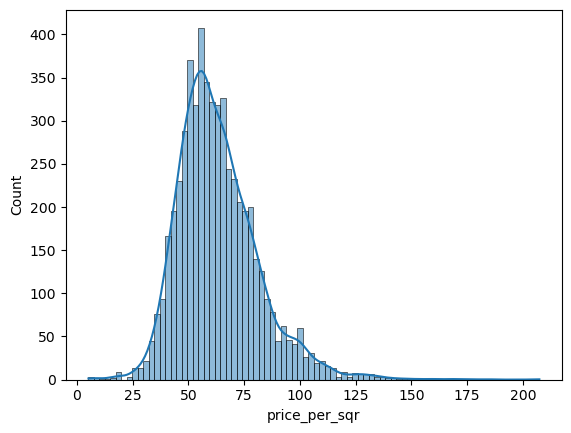

In [22]:
sns.histplot(df3['price_per_sqr'], kde = True)

In [23]:
def std_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('street'):
        m = np.mean(subdf.price_per_sqr)
        st = np.std(subdf.price_per_sqr)
        reduced_df = subdf[(subdf.price_per_sqr > (m-st)) & (subdf.price_per_sqr <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df4 = std_outliers(df3)

In [24]:
df4.describe()

,price,size,terrace,floor,rooms,price_per_sqr
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,3089.565813,50.975184,0.073548,2.727365,2.217854,61.602534
std,1151.466309,17.441381,0.261067,2.524960,0.751096,12.005815
min,720.000000,10.000000,0.000000,-1.000000,1.000000,25.696329
25%,2499.000000,40.000000,0.000000,1.000000,2.000000,52.843666
50%,2800.000000,48.500000,0.000000,2.000000,2.000000,60.000000
75%,3499.500000,58.000000,0.000000,4.000000,3.000000,68.619043
max,15999.000000,163.000000,1.000000,44.000000,6.000000,120.192308


<Axes: xlabel='price_per_sqr', ylabel='Count'>

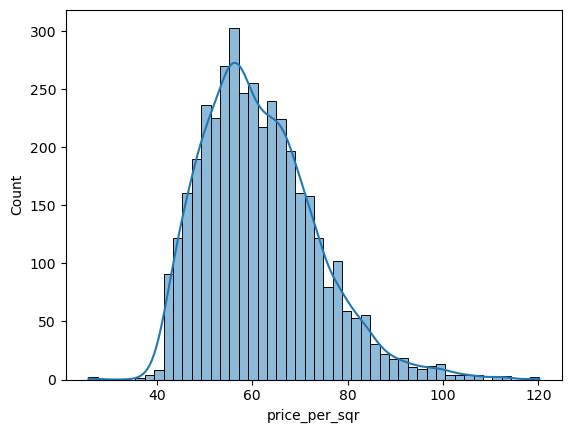

In [25]:
sns.histplot(df4['price_per_sqr'], kde = True)

<Axes: xlabel='rooms', ylabel='price'>

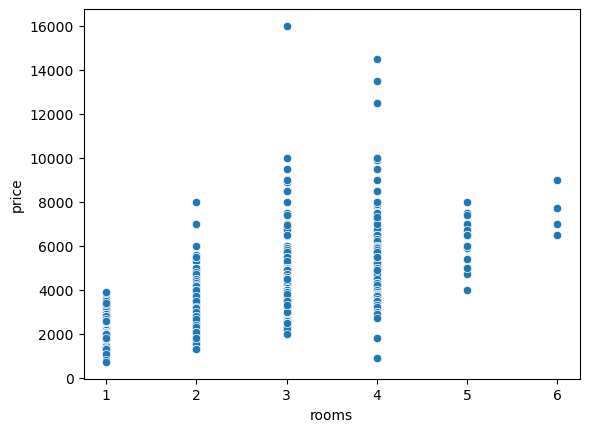

In [26]:
sns.scatterplot(data = df4, x = 'rooms', y= 'price')

<Axes: xlabel='size', ylabel='price'>

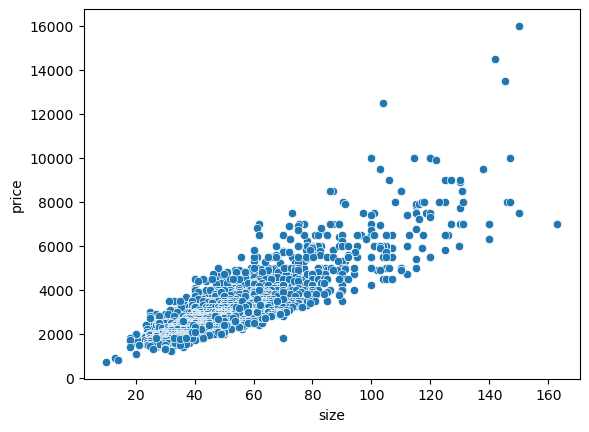

In [27]:
sns.scatterplot(data = df4, x = 'size', y= 'price')

In [28]:
df5 = df4.drop(['price_per_sqr'],axis='columns')
df5.head(3)

,price,size,terrace,floor,rooms,street
0,3500,57.2,0,1.0,3.0,Arbuzowa
1,2801,45.0,0,3.0,2.0,Arbuzowa
2,2800,45.0,0,3.0,2.0,Arbuzowa


In [29]:
dummies = pd.get_dummies(df5.street, dtype=float)
dummies.head(3)

,Arbuzowa,Awicenny,Bacciarellego,Bema,Białowieska,Borowska,Braniborska,Brzoskwiniowa,Buforowa,Buraczana,...,Zatorska,Zielińskiego,Zwycięska,Zyndrama z maszkowic,other,Łubinowa,Ślężna,Śrutowa,Żeromskiego,Żmudzka
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df6 = pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head()

,price,size,terrace,floor,rooms,street,Arbuzowa,Awicenny,Bacciarellego,Bema,...,Zarembowicza,Zatorska,Zielińskiego,Zwycięska,Zyndrama z maszkowic,Łubinowa,Ślężna,Śrutowa,Żeromskiego,Żmudzka
0,3500,57.2,0,1.0,3.0,Arbuzowa,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2801,45.0,0,3.0,2.0,Arbuzowa,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2800,45.0,0,3.0,2.0,Arbuzowa,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2600,62.0,0,0.0,3.0,Arbuzowa,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2500,42.0,0,1.0,2.0,Arbuzowa,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df7 = df6.drop('street',axis='columns')
df7.head(2)

,price,size,terrace,floor,rooms,Arbuzowa,Awicenny,Bacciarellego,Bema,Białowieska,...,Zarembowicza,Zatorska,Zielińskiego,Zwycięska,Zyndrama z maszkowic,Łubinowa,Ślężna,Śrutowa,Żeromskiego,Żmudzka
0,3500,57.2,0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2801,45.0,0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X = df7.drop(['price'],axis='columns')
X.head(3)

,size,terrace,floor,rooms,Arbuzowa,Awicenny,Bacciarellego,Bema,Białowieska,Borowska,...,Zarembowicza,Zatorska,Zielińskiego,Zwycięska,Zyndrama z maszkowic,Łubinowa,Ślężna,Śrutowa,Żeromskiego,Żmudzka
0,57.2,0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.0,0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
y = df7.price
y.head(3)

0    3500
1    2801
2    2800
Name: price, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=33)

In [35]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8157140409921884

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=33)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81571404, 0.82667926, 0.830459  , 0.8457213 , 0.8097597 ])

In [37]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=33)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=True)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/home/tomallos/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tomallos/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tomallos/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/tomallos/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    val

,model,best_score,best_params
0,linear_regression,0.825667,{'copy_X': False}
1,lasso,0.805716,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.733155,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [38]:
def predict_price(street, sqr, rooms, floor, terrace):    
    loc_index = np.where(X.columns==street)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqr
    x[1] = rooms
    x[2] = floor
    x[3] = terrace
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [39]:
predict_price('Bema',100, 3, 2, 1)

/home/tomallos/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6616.681104721312

In [40]:
predict_price('Zarembowicza',50, 2, 2, 1)

/home/tomallos/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3837.761177395815

In [41]:
predict_price('Zarembowicza',50, 2, 2, 0)

/home/tomallos/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3815.377121540872

In [42]:
import pickle
with open('Prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [43]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
